# Shark Attacks and Economy: Is there any significant correlation?

# 1. Importation of the libraries and files.

In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse
import numpy as np
import warnings
warnings.filterwarnings('ignore')

"""It reads the csv given from Kaggle.We are calling this the original dataset."""
shark_att_orig=pd.read_csv("data_files/attacks.csv",encoding="latin_1")

"""It reads the csv needed to complement the analysis.
New data will include data of shark attacks from a larger period than the data provided in the project.
The idea is to have information from 2018 and 2019 that is not in the original data given in 
GitHub. This data comes from Open Data Soft."""
shark_att_new=pd.read_csv("data_files/global-shark-attack.csv",delimiter=";")

""" This reads a csv and an excel file in order to import data about GDP per Capita in US and 
GDP per Capita in US Federal States."""
usa_gdp_per_country=pd.read_csv("data_files/united-states-gdp-per-capita.csv",delimiter=",")
usa_gdp_per_state=pd.read_excel("data_files/Business - State Gross Domestic Product.xlsx",index_col=0)

In [2]:
"""I import the file with the functions"""
%load_ext autoreload
%autoreload 2
import function_project as f

# 2. Data Wrangling

2.1 Data Wrangling of the Original Data.

In [3]:
shark_att_orig_copy=shark_att_orig

In [4]:
"""We eliminate the spaces that are in the beginning or the end. And for the remaining
spaces, we change them for _. This is to make columns more accesible when we want to filter."""

shark_att_orig_copy.columns=shark_att_orig_copy.columns.str.strip().str.replace(" ","_").str.replace(".","_")

In [5]:
"""We are going to drop the rows which all the values of the rows are Nulls"""

shark_att_orig_copy.dropna(how = 'all',inplace=True)

In [6]:
"""We do a check of rows that the Year is null but Case_Number is not. We do it in order
to make sure that we have many rows with Year as possible."""


f.check_nulls(shark_att_orig_copy,"Year","Case_Number")

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
"""We format the Case Number, Date and Year of the row with label 187 and 6079 because the table above."""

shark_att_orig_copy.loc[187,"Case_Number"]=shark_att_orig_copy.loc[187,"Case_Number"].replace("R.","")
shark_att_orig_copy.loc[187,"Date"]=shark_att_orig_copy.loc[187,"Date"].replace("Reported ","")
shark_att_orig_copy.loc[187,"Year"]=2017
shark_att_orig_copy.loc[6079,"Case_Number"]=shark_att_orig_copy.loc[187,"Case_Number"].replace("R.","")
shark_att_orig_copy.loc[6079,"Date"]=shark_att_orig_copy.loc[187,"Date"].replace("Reported ","")
shark_att_orig_copy.loc[6079,"Year"]=1836

In [8]:
"""We do a check of rows that the Year is null but Case_Number_1 is not"""
f.check_nulls(shark_att_orig_copy,"Year","Case_Number_1")

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23


In [9]:
"""We do a check of rows that the Year is null but Case_Number_2 is not"""
f.check_nulls(shark_att_orig_copy,"Year","Case_Number_2")

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23


In [10]:
"""We do a check of rows that the Year is null but Date is not"""
f.check_nulls(shark_att_orig_copy,"Year","Date")

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23


In [11]:
"""Now we can filter by Year"""
shark_att_2000_2018=shark_att_orig[shark_att_orig["Year"]>1999]

In [12]:
shark_att_2000_2018

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2000.02.03,03-Feb-2000,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,...,NaN,"Waikato Times; Southland Times, 10/23/1999, p.1",2000.02.03-Petas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.03,2000.02.03,4229.0,NaN,NaN
2075,2000.02.01,01-Feb-2000,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,...,3 m [10'] shark,"T. Peake, GSAF",2000.02.01-Hayes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.01,2000.02.01,4228.0,NaN,NaN
2076,2000.01.28.R,Reported 28-Jan-2000,2000.0,Boat,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,...,NaN,B.L. du Vendre,2000.01.28.R-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.01.28.R,2000.01.28.R,4227.0,NaN,NaN
2077,2000.01.05,05-Jan-2000,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,...,NaN,A. Xuereb,2000.01.05-Kahl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.01.05,2000.01.05,4226.0,NaN,NaN


Our client has asked us to clean the data for Date, Year, Country, Area, Sex and Age. First, we are going to start by cleaning the Date.

In [13]:
"""We eliminate certian words from the date and we eliminate the spaces"""

f.no_spaces(shark_att_2000_2018,"Date","all") #we indicate all because we want to eliminate all spaces
f.eliminate_words(shark_att_2000_2018,"Date",['""',"Reported","tohavehappened","ontheweekend"]) #we want to eliminate the world Reported

In [14]:
"""Now we want to check if the string could be a date or not. If not, put on a list"""

strings_not_convertable=f.check_date(shark_att_2000_2018)

In [15]:
"""We change the nomenclature of some months in order to be able to transform it into
Datetime."""

f.change_month(shark_att_2000_2018,strings_not_convertable)

In [16]:
"""We check the date again in order to check there are some cases to convert"""
f.check_date(shark_att_2000_2018)

['19-Jul-2007.b', '19-Jul-2007.a', '19-Jul-2004""']

In [17]:
"""We search for the indexes of the previous values """
for label in list(shark_att_2000_2018[shark_att_2000_2018['Date'].isin(['19-Jul-2007.b', '19-Jul-2007.a', '19-Jul-2004havhan"nhwkn"'])].index):
    shark_att_2000_2018.loc[label,"Date"]=shark_att_2000_2018.loc[label,"Date"][:11]

In [18]:
"""We check the date again in order to check if there are some cases to convert"""
f.check_date(shark_att_2000_2018)

['19-Jul-2004""']

In [19]:
"""We transform the case of the result above,so it could be transformed into datetime afterwards."""
for label,value in dict(shark_att_2000_2018.Date).items():
    if value=='19-Jul-2004""':
        shark_att_2000_2018.loc[label,"Date"]='19-Jul-2004'

In [20]:
"""We eliminate the rows that the date don't have 2 times this the -, since they could not be transformed"""
for label,value in dict(shark_att_2000_2018.Date).items():
    if str(value).count("-")!=2:
        shark_att_2000_2018.drop(label,inplace=True)

In [21]:
"""Another data cleaning for Date"""
for i,v in dict(shark_att_2000_2018["Date"]).items():
    """We fill a 0 with the ones that only has one digit in day"""
    if len(v)!=11 and v.find("-")==1:
        shark_att_2000_2018.loc[i,"Date"]=f"{0}{v}" 
    #We eliminate the point from the value
    elif "." in v:
        shark_att_2000_2018.loc[i,"Date"]=shark_att_2000_2018.loc[i,"Date"].replace(".","")
    #We change the ones with July in order to put Jul
    elif "July" in v:
        shark_att_2000_2018.loc[i,"Date"]=shark_att_2000_2018.loc[i,"Date"].replace("July","Jul")


In [22]:
"""We have transform the Date column in order to have datetime format"""
shark_att_2000_2018["Date"]=pd.to_datetime(shark_att_2000_2018.Date,format="%d-%b-%Y")

In [23]:
shark_att_2000_2018["Date"]

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
2073   2000-02-14
2074   2000-02-03
2075   2000-02-01
2076   2000-01-28
2077   2000-01-05
Name: Date, Length: 2021, dtype: datetime64[ns]

In [24]:
"""Now we are going to format the column Country so there is no initial spaces and
all the characters are uppercase."""
shark_att_2000_2018["Country"]=shark_att_2000_2018["Country"].apply(lambda x: str(x).strip().upper())

In [25]:
"""Now we are going to format the column Area so there are no spaces at the beginning 
or the end. Also we are transforming some cases to make it easier to analyze."""

f.no_spaces(shark_att_2000_2018,"Area","not_all")
f.fill_area_correctly(shark_att_2000_2018)

In [26]:
"""Now we are going to format the column Location so there are no spaces at the beginning 
or the end"""
f.no_spaces(shark_att_2000_2018,"Location","not_all")

In [27]:
"""Now we are going to group by categories the Activity since there are so many unique values.
Therefore, it would be easier to analyze if there are caegories"""


f.activity_class(shark_att_2000_2018)

In [28]:
"""Now we are going to format the column Sex so there are no spaces at the beginning 
or the end"""
f.no_spaces(shark_att_2000_2018,"Sex","not_all")

"""We corrected some rows with invalid register on the Sex column."""
f.assign_sex(shark_att_2000_2018)

In [29]:
"I transform the column age in order to only have numbers or nulls based on multiple criteria"

f.age_cleaning(shark_att_2000_2018)


In [30]:
"""Let's transform Fatal since there are invalid registers and registers with spaces that will generate problems
with the analysis if they are not transformed"""

f.no_spaces(shark_att_2000_2018,"Fatal_(Y/N)","all")

f.assign_fatal(shark_att_2000_2018)

In [31]:
shark_att_2000_2018.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddle boarding,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [32]:
shark_att_2000_2018.dtypes

Case_Number                       object
Date                      datetime64[ns]
Year                             float64
Type                              object
Country                           object
Area                              object
Location                          object
Activity                          object
Name                              object
Sex                               object
Age                              float64
Injury                            object
Fatal_(Y/N)                       object
Time                              object
Species                           object
Investigator_or_Source            object
pdf                               object
href_formula                      object
href                              object
Case_Number_1                     object
Case_Number_2                     object
original_order                   float64
Unnamed:_22                       object
Unnamed:_23                       object
dtype: object

In [33]:
"""We have looked at the Species column. Looking there, there are cases which it does not
confirm the involvement of a shark attack or it does not give information about the type of
shark. 
Therefore, we have decided to eliminate those doubtfull cases."""

not_include = "involvement|invalid|unlikely|questionable|\xa0|unidentified"
shark_att_2000_2018.drop(shark_att_2000_2018[(shark_att_2000_2018["Species"].str.lower().str.contains(not_include) == True)|(shark_att_2000_2018["Species"]==" ")|(shark_att_2000_2018["Species"].isnull()==True)].index, inplace=True)

In [34]:
"""We do the drop of nulls based on certain columns"""

shark_att_2000_2018.dropna(subset=["Date","Year","Country","Area","Sex","Age","Fatal_(Y/N)","Species"],inplace=True)

In [35]:
"""Now we can see the data transformed after doing data wrangling"""
shark_att_2000_2018

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed:_22,Unnamed:_23
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddle boarding,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
6,2018.06.03.a,2018-06-03,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
10,2018.05.24,2018-05-24,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeading wild animals,male,M,...,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2000.03.30,2000-03-30,2000.0,Unprovoked,AUSTRALIA,Queensland,"Main Beach, Gold Coast",Swimming,Anrija (Andy) Rojcezic,M,...,2.5 m shark,"T. Peake, GSAF",2000.03.30-Rojcevic.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.30,2000.03.30,4242.0,NaN,NaN
2062,2000.03.26,2000-03-26,2000.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Boogie boarding,Heather Van Olst,F,...,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",2000.03.26-VanOlst.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.26,2000.03.26,4241.0,NaN,NaN
2063,2000.03.24,2000-03-24,2000.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Barry Pasonski,M,...,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",2000.03.24-Pasonski.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.24,2000.03.24,4240.0,NaN,NaN
2064,2000.03.15,2000-03-15,2000.0,Unprovoked,NEW CALEDONIA,North Province,Poum,Fishing,Gilbert Bui Van Minh,M,...,Tiger shark?,"Les Nouvelles Caledoniennes, 3/16/2000",2000.03.15-GilbertBui.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.15,2000.03.15,4239.0,NaN,NaN


2.2 Data Wrangling of the new Database.

In [36]:
"""Now we are going to check the data provided from Open Source about shark attacks.
As said, our goal to have a clean database of June 2018 to December 2019. This period would
be added into original dataset in order to have a larger sample."""

"""We are going to clean the database based on the analysis"""

shark_att_new.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2022.07.25,2022-07-25,2022.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Wading,Bryan Oliveres,M,...,N,15h00,Blacktip shark?,"Wesh.com, 7/25/2022",2022.07.25-Oliveres.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.07.25,2022.07.25,6790.0
1,2022.07.03.a,2022-07-03,2022.0,Unprovoked,USA,New York,"Smith Point Beach, Suffolk County",Lifeguard Exercises,Zach Gallo,M,...,N,10h15,5'shark,"ABC7,7/3/2022",2022.07.03.a-Gallo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.07.03.a,2022.07.03.a,6778.0
2,2022.03.31,2022-03-31,2022.0,Provoked,USA,Florida,"Lake Worth Beach, Palm Beach County",Fishing,male,M,...,n,Morning,NaN,"K. McMurray, TrackingSharks.com",2022.03.31-LakeWorth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.03.31,2022.03.31,6749.0
3,2022.01.09,2022-01-09,2022.0,Unprovoked,NEW ZEALAND,South Island,"Friendly Bay, Oamaru",Swimming,Alvira Repia-King,F,...,N,16h30,Sevengill shark,"Otago Daily Times, 1/9/2022",2022.01.09-Repia-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.01.09,2022.01.09,6730.0
4,2021.10.03.a,2021-10-03,2021.0,Unprovoked,USA,California,"Salmon Creek Beach, Sonoma County",Surfing,Eric Steinley,M,...,N,09h00,NaN,"R. Collier, GSAF & K.",2021.10.03.a-Steinley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.03.a,2021.10.03.a,6709.0


In [37]:
"""We eliminate the spaces that are in the beginning or the end. And for the remaining
spaces, we change them for _. This is to make columns more accesible when we want to filter."""

shark_att_new.columns=shark_att_new.columns.str.strip().str.replace(" ","_").str.replace(".","_")

In [38]:
"""We filter by Year(2018,2019) that we want to add in analysis that are Missing"""

shark_att_new_2018_2019=shark_att_new[(shark_att_new["Year"]==2018)|(shark_att_new["Year"]==2019)]

In [39]:
"""We eliminate the word R. from the date and we eliminate the spaces"""

f.no_spaces(shark_att_new_2018_2019,"Date","all") #we indicate all because we want to eliminate all spaces
f.eliminate_words(shark_att_new_2018_2019,"Date",list(".R")) #we want to eliminate the world Reported

In [40]:
"""First we eliminate the register that has date 1018-06-01"""
[shark_att_new_2018_2019.drop([label],inplace=True) for label, year in dict(shark_att_new_2018_2019["Date"]).items() if '1018' in year]


"""We put Format DateTime"""
shark_att_new_2018_2019["Date"]=pd.to_datetime(shark_att_new_2018_2019.Date,format="%Y-%m-%d")

In [41]:
"""Now we are going to format of the column Country so there is no initial spaces and
there all the characters are uppercase."""
shark_att_new_2018_2019["Country"]=shark_att_new_2018_2019["Country"].apply(lambda x: str(x).strip().upper())

In [42]:
"""Now we are going to format the column Area so there are no spaces at the beginning 
or the end."""

f.no_spaces(shark_att_new_2018_2019,"Area","not_all")

In [43]:
"""Now we are going to group by categories the Activity since there are so many unique values.
Therefore, it would be easier to analyze if there are caegories"""


f.activity_class(shark_att_new_2018_2019)

In [44]:
"I transform the column Age in order to only have numbers or nulls based on multiple criteria"

f.age_cleaning(shark_att_new_2018_2019)

In [45]:
"""We have looked at the Species column. Looking there, there are cases which it does not
confirm the involvement of a shark attack or it does not give information about the type of
shark. 
Therefore, we have decided to eliminate those doubtfull cases."""

not_include = "involvement|invalid|unlikely|questionable|\xa0|unidentified"
shark_att_new_2018_2019.drop(shark_att_new_2018_2019[(shark_att_new_2018_2019["Species"].str.lower().str.contains(not_include) == True)|(shark_att_new_2018_2019["Species"]==" ")|(shark_att_new_2018_2019["Species"].isnull()==True)].index, inplace=True)

In [46]:
"""We do the drop of nulls based on certain important columns"""

shark_att_new_2018_2019.dropna(subset=["Date","Year","Country","Area","Sex","Age","Fatal_(Y/N)","Species"],inplace=True)

In [47]:
"""We want to know which columns have both databases"""
print(shark_att_new_2018_2019.columns)
print(shark_att_2000_2018.columns)

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href_formula', 'href',
       'Case_Number_1', 'Case_Number_2', 'original_order'],
      dtype='object')
Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href_formula', 'href',
       'Case_Number_1', 'Case_Number_2', 'original_order', 'Unnamed:_22',
       'Unnamed:_23'],
      dtype='object')


Now we are going to merge both datasets and remove duplicates.

In [48]:
"We don not include Unnamed:_22 in order to concat both databases"

shark_att_2000_2018_analy=shark_att_2000_2018[['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href_formula', 'href',
       'Case_Number_1', 'Case_Number_2', 'original_order']]

In [49]:
"""We merge both Databases"""

merged_data=pd.concat([shark_att_2000_2018_analy,shark_att_new_2018_2019],axis=0)

In [50]:
"""Now it's time to drop the duplicates"""

merged_data.drop_duplicates(['Date', 'Year', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Fatal_(Y/N)', 'Time',
       'Species'],keep='first',inplace=True)

# Analysis

In [51]:
"""The analysis is only for USA and between 2000 and 2019. Therefore, we should filter by 
Year and by Country."""

merged_data_analysis=merged_data[(merged_data["Country"]=="USA")&(merged_data["Year"]>1999)]

"""Then we reset index to make it easier to read it and access."""

merged_data_analysis.reset_index(drop=True,inplace=True)

In [52]:
merged_data_analysis.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddle boarding,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
2,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
3,2018.04.19,2018-04-19,2018.0,Unprovoked,USA,Hawaii,"Shipwrecks Beach, Keoneloa Bay, Kauai",Body boarding_surfing,Dylan McWilliams,M,...,N,NaN,6' shark,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278.0
4,2018.03.31,2018-03-31,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Paddle boarding,male,M,...,N,09h30,"Tiger shark, 12'","Khon2, 3/31/2018",2018.03.31-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.31,2018.03.31,6268.0


In [53]:
"""We check the database of usa_gdp_per_country"""

usa_gdp_per_country.head()

,date,GDP Per Capita (US $),Annual Growth Rate (%)
0,1960-12-31,3007.1234,NaN
1,1961-12-31,3066.5629,1.98
2,1962-12-31,3243.8431,5.78
3,1963-12-31,3374.5152,4.03
4,1964-12-31,3573.9412,5.91


In [54]:
"""Let's transform the date in order that appears a datetime format."""

usa_gdp_per_country["date"]=pd.to_datetime(usa_gdp_per_country.date,format="%Y-%m-%d")

In [55]:
"""Let's transform the date in order that only appears the Year.Also we put the year as a float since the 
other database have it as a float"""

usa_gdp_per_country["date"]=usa_gdp_per_country["date"].apply(lambda x: float(x.year))

"""Also we change the column date to Year to make it more comprehensible. Also we will rename
GDP Per Capita (US $) and Annual Growth Rate (%) in order to not have spaces."""

usa_gdp_per_country.rename(columns={'date': 'Year',' GDP Per Capita (US $)':
                                    'GDP_Per_Capita_US$',' Annual Growth Rate (%)':
                                    'Annual_Growth_Rate(%)'
                                   },inplace=True)

In [56]:
"""Then we will set Year as an index."""


usa_gdp_per_country.set_index('Year',inplace=True)

In [57]:
"""Now we have to to group by our data so we can do the join with the the US data"""
"""First you indicate the database. Then you indicate the column you want to do the group
by. After you indicate the column you want to do the aggregation and which method will use
for the aggregation."""


merged_data_agg=f.group_column(merged_data_analysis,"Year","Country","count")

In [58]:
"""Then we do an inner join to add the GDP per capita per Year."""

shark_gdp_us=pd.merge(merged_data_agg, usa_gdp_per_country[["GDP_Per_Capita_US$"]],
                                              left_index=True, right_index=True)


In [59]:
shark_gdp_us["N_attacks_per_year"].corr(shark_gdp_us["GDP_Per_Capita_US$"])

-0.04190498772919451

<AxesSubplot:xlabel='N_attacks_per_year', ylabel='GDP_Per_Capita_US$'>

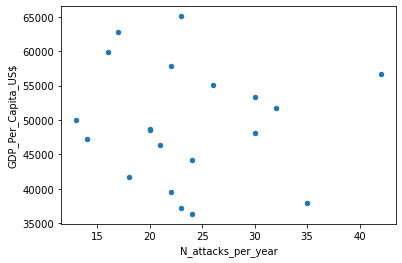

In [60]:
shark_gdp_us.plot.scatter(x='N_attacks_per_year',
                    y='GDP_Per_Capita_US$')

We could see the correlation between the attacks per year and GDP per Capita in US is insignificant.

Now we will study the correlation at State level rather than country. We will do the comparisons for the 3 states with more shark attacks.

In [61]:
"""The three States with more shark attacks."""

list(dict(merged_data_analysis.Area.value_counts()).keys())[:3]

['Florida', 'Hawaii', 'California']

In [62]:
"""We create a function to calculate the correlation per Area"""

def corr_per_area(column):
    merged_data_grouped=merged_data_analysis[merged_data_analysis["Area"].isin([column])].groupby(by=["Area","Year"])
    merged_data_grouped=merged_data_grouped.agg({"Country":"count"})
    merged_data_grouped.rename(columns={"Country":"N_attacks_per_year"},inplace=True)
    attacks_gdp=merged_data_grouped.reset_index().set_index("Year").join(pd.DataFrame(usa_gdp_per_state.loc[column]),how="inner")
    attacks_gdp.rename(columns={column:"gdp_per_capita"},inplace=True)
    print("coef correlation",attacks_gdp["N_attacks_per_year"].corr(attacks_gdp["gdp_per_capita"]))
    return attacks_gdp.plot.scatter(x='N_attacks_per_year',
                    y="gdp_per_capita")


coef correlation -0.44784513542737747


<AxesSubplot:xlabel='N_attacks_per_year', ylabel='gdp_per_capita'>

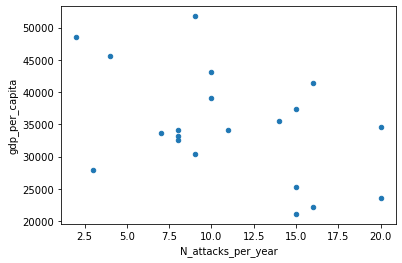

In [63]:
"""The correlation between shark attacks and gdp per capita in Florida"""

corr_per_area("Florida")

coef correlation 0.3731899746885898


<AxesSubplot:xlabel='N_attacks_per_year', ylabel='gdp_per_capita'>

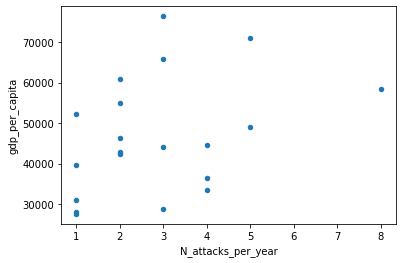

In [64]:
corr_per_area("California")

coef correlation 0.334788287261864


<AxesSubplot:xlabel='N_attacks_per_year', ylabel='gdp_per_capita'>

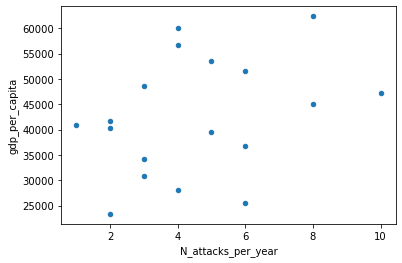

In [65]:
corr_per_area("Hawaii")